# Libraries and Configs

In [ ]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/my_drive')

Mounted at /content/my_drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
print(np.__version__)
print(tf.__version__)
print(keras.__version__)

1.19.5
2.5.0
2.5.0


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!nvidia-smi

Mon Aug  2 09:40:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    28W /  70W |    222MiB / 15109MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
epochs = 100
learning_rate = 1e-6
batch_size = 128
image_size = (224, 224)
num_classes = 2

# Dataset (Dog vs Cat)

In [ ]:
base_path = '/content/my_drive/MyDrive/Deep Learning/Dataset/Dog & Cat'
train_data = keras.preprocessing.image_dataset_from_directory(
    directory = f"{base_path}/train", 
    validation_split = 0.2,
    subset = "training",
    seed = 12345,
    batch_size = batch_size, 
    label_mode = 'categorical',
    image_size = image_size
)
validation_data = keras.preprocessing.image_dataset_from_directory(
    directory = f"{base_path}/train", 
    validation_split = 0.2,
    subset = "validation",
    seed = 12345,
    batch_size = batch_size, 
    label_mode = 'categorical',
    image_size = image_size
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


In [ ]:
print(type(train_data))
for data, labels in train_data:
    # print(data)
    print(data.shape)
    print(data.dtype)
    print(labels.shape)
    print(labels.dtype)
    break

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
(128, 224, 224, 3)
<dtype: 'float32'>
(128, 2)
<dtype: 'float32'>


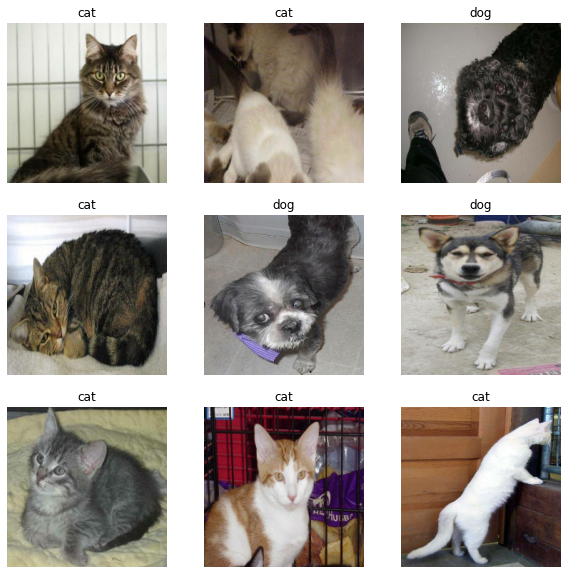

In [ ]:
def decode_label(x):
    if x[0] > x[1]:
        return "cat"
    return "dog"

plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(decode_label(labels[i]))
        plt.axis("off")

# VGG19

In [ ]:
vgg19_model = tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## Implement VGG19

In [ ]:
def VGG19(num_classes):
    # input and preprocessing
    inputs = keras.Input(shape=(224, 224, 3))
    # VGG19
    # Convolution Layer
    x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu")(inputs)
    x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation="relu")(x)
    x = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    # Fully Connected Layer
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(units=4096, activation="relu")(x)
    x = keras.layers.Dense(units=4096, activation="relu")(x)
    outputs = keras.layers.Dense(units=num_classes, activation="softmax")(x)
    return keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model = VGG19(num_classes)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0     

In [ ]:
history1 = model.fit(x=train_data, validation_data=validation_data, epochs=epochs)

Epoch 1/100
13/13 [==============================] - 110s 6s/step - loss: 0.6947 - accuracy: 0.4800 - val_loss: 0.6905 - val_accuracy: 0.5575
Epoch 2/100
13/13 [==============================] - 30s 2s/step - loss: 0.6893 - accuracy: 0.5169 - val_loss: 0.6890 - val_accuracy: 0.5025
Epoch 3/100
13/13 [==============================] - 31s 2s/step - loss: 0.6853 - accuracy: 0.5581 - val_loss: 0.6865 - val_accuracy: 0.5300
Epoch 4/100
13/13 [==============================] - 31s 2s/step - loss: 0.6815 - accuracy: 0.6187 - val_loss: 0.6834 - val_accuracy: 0.5900
Epoch 5/100
13/13 [==============================] - 31s 2s/step - loss: 0.6772 - accuracy: 0.6319 - val_loss: 0.6802 - val_accuracy: 0.5825
Epoch 6/100
13/13 [==============================] - 31s 2s/step - loss: 0.6728 - accuracy: 0.6194 - val_loss: 0.6758 - val_accuracy: 0.6100
Epoch 7/100
13/13 [==============================] - 31s 2s/step - loss: 0.6669 - accuracy: 0.6294 - val_loss: 0.6708 - val_accuracy: 0.6350
Epoch 8/100


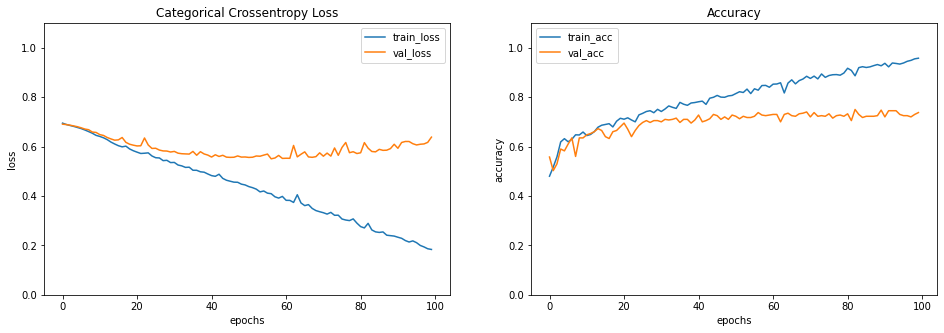

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.set_title('Categorical Crossentropy Loss')
ax1.plot(history1.history['loss'], label='train_loss')
ax1.plot(history1.history['val_loss'], label='val_loss')
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.set_ylim(0, 1.1)
ax1.legend()
ax2.set_title('Accuracy')
ax2.plot(history1.history['accuracy'], label='train_acc')
ax2.plot(history1.history['val_accuracy'], label='val_acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("accuracy")
ax2.set_ylim(0, 1.1)
ax2.legend();

## Pre-train VGG19

In [ ]:
def Pretrain_VGG19(num_classes):
    # input and preprocessing
    inputs = keras.Input(shape=(224, 224, 3))
    # VGG19
    # Freeze Layer
    x = inputs
    for layer in vgg19_model.layers[1:17]:
        layer.trainable = False
        x = layer(x)
    # Trainable Layer
    for layer in vgg19_model.layers[17:25]:
        x = layer(x)
    # Output Layer
    outputs = keras.layers.Dense(units=num_classes, activation="softmax")(x)
    return keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
pretrained_vgg19_model = Pretrain_VGG19(num_classes)
pretrained_vgg19_model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
pretrained_vgg19_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
history2 = pretrained_vgg19_model.fit(x=train_data, validation_data=validation_data, epochs=epochs)

Epoch 1/100
13/13 [==============================] - 17s 1s/step - loss: 0.5212 - accuracy: 0.7862 - val_loss: 0.3637 - val_accuracy: 0.8575
Epoch 2/100
13/13 [==============================] - 16s 1s/step - loss: 0.2367 - accuracy: 0.9156 - val_loss: 0.2439 - val_accuracy: 0.9200
Epoch 3/100
13/13 [==============================] - 16s 1s/step - loss: 0.1363 - accuracy: 0.9563 - val_loss: 0.2033 - val_accuracy: 0.9200
Epoch 4/100
13/13 [==============================] - 16s 1s/step - loss: 0.0902 - accuracy: 0.9762 - val_loss: 0.1748 - val_accuracy: 0.9350
Epoch 5/100
13/13 [==============================] - 16s 1s/step - loss: 0.0609 - accuracy: 0.9844 - val_loss: 0.1607 - val_accuracy: 0.9400
Epoch 6/100
13/13 [==============================] - 16s 1s/step - loss: 0.0429 - accuracy: 0.9900 - val_loss: 0.1499 - val_accuracy: 0.9425
Epoch 7/100
13/13 [==============================] - 16s 1s/step - loss: 0.0311 - accuracy: 0.9944 - val_loss: 0.1422 - val_accuracy: 0.9450
Epoch 8/100
1

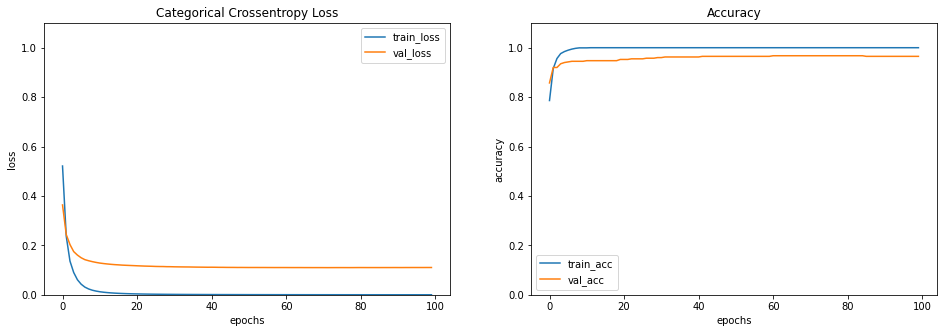

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
ax1.set_title('Categorical Crossentropy Loss')
ax1.plot(history2.history['loss'], label='train_loss')
ax1.plot(history2.history['val_loss'], label='val_loss')
ax1.set_xlabel("epochs")
ax1.set_ylabel("loss")
ax1.set_ylim(0, 1.1)
ax1.legend()
ax2.set_title('Accuracy')
ax2.plot(history2.history['accuracy'], label='train_acc')
ax2.plot(history2.history['val_accuracy'], label='val_acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("accuracy")
ax2.set_ylim(0, 1.1)
ax2.legend();

# Save and Load Model

In [ ]:
pretrained_vgg19_model.save('/content/my_drive/MyDrive/Deep Learning/Dataset/Dog & Cat/pretrained_vgg19_model')

INFO:tensorflow:Assets written to: /content/my_drive/MyDrive/Deep Learning/Dataset/Dog & Cat/pretrained_vgg19_model/assets


In [ ]:
model = keras.models.load_model('/content/my_drive/MyDrive/Deep Learning/Dataset/Dog & Cat/pretrained_vgg19_model')

In [ ]:
all_data = keras.preprocessing.image_dataset_from_directory(
    directory = f"{base_path}/train", 
    batch_size = batch_size, 
    label_mode = 'categorical',
    image_size = image_size
)

Found 2000 files belonging to 2 classes.


In [ ]:
false_predict = list()
for data, labels in all_data:
    labels = [decode_label(e) for e in labels]
    predict = model.predict(data)
    predict_labels = [decode_label(e) for e in predict]
    for i in range(len(labels)):
        if labels[i] != predict_labels[i]:
            temp = dict()
            temp['image'] = data[i].numpy().astype("uint8")
            temp['predict'] = predict_labels[i]
            false_predict.append(temp)

total false: 14


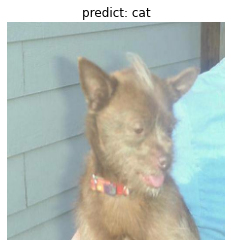

In [ ]:
print(f"total false: {len(false_predict)}")
false_index = 1
plt.imshow(false_predict[false_index]['image'])
plt.title("predict: " + false_predict[false_index]['predict'])
plt.axis("off");